# Rainfall
Its been a very dry spring this year and unfotunately that affected my allotment crops. I was trying to find a decent online cumalative rainfall monitor to have an idea as to how dry it has been however I didnt manage to find one. Luckly the Enviornment agency had a free rainfall API which allows acess to past data. This project involves trying to get a gague on how dry it has been and how much more water I require to keep my plants healthy. 

In [44]:
import pandas as pd
import json
import requests


x = requests.get('https://environment.data.gov.uk/flood-monitoring/id/stations?parameter=rainfall')

data = x.json()
locations = {}

for item in data["items"]:
    try:
        lat = item["lat"]
        lon = item["long"] # some are flood monitoring stations without a name
        iden = item["stationReference"]
        locations[iden] =  [lon, lat]
    except KeyError:
        pass
    
print(locations)

{'E7050': [-1.171327, 52.186277], '4163': [-1.163701, 52.986245], 'E1310': [-0.649292, 52.493886], '3680': [-0.995167, 52.73152], '3275': [-1.944539, 52.635078], '3167': [-1.990391, 52.419334], '3307': [-1.901908, 53.196879], '3404': [-1.579192, 53.287863], '3014': [-2.182004, 52.886657], '3901': [-1.088289, 53.305797], '3999': [-1.199634, 52.564065], '1412': [-2.975413, 52.47914], 'Not_Specified': [1.132036, 52.029778], '0': [-3.258163, 51.281257], 'E13600': [-1.558591, 50.880106], '242534TP': [-0.03963, 51.807828], 'E8520': [-0.097897, 51.039914], '276316TP': [-0.217242, 51.718037], 'E10130': [-0.408138, 51.185738], 'E24238': [-0.206231, 52.323011], 'E10510': [-0.642384, 51.053802], '000181TP': [0.040992, 51.730021], '238605TP': [0.136235, 51.722932], '52210': [-2.434971, 51.116625], '47161': [-4.209541, 50.516447], 'E1039': [0.317508, 53.102452], 'E8770': [0.081008, 50.893868], '244569TP': [-0.10539, 51.727077], '595273': [-3.214413, 54.760082], '46104': [-3.702476, 50.53756], '0770

[-1.171327, 52.186277, 'http://environment.data.gov.uk/flood-monitoring/id/measures/E7050-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-1.163701, 52.986245, 'http://environment.data.gov.uk/flood-monitoring/id/measures/4163-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-0.649292, 52.493886, 'http://environment.data.gov.uk/flood-monitoring/id/measures/E1310-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-0.995167, 52.73152, 'http://environment.data.gov.uk/flood-monitoring/id/measures/3680-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-1.944539, 52.635078, 'http://environment.data.gov.uk/flood-monitoring/id/measures/3275-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-1.990391, 52.419334, 'http://environment.data.gov.uk/flood-monitoring/id/measures/3167-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-1.901908, 53.196879, 'http://environment.data.gov.uk/flood-monitoring/id/measures/3307-rainfall-tipping_bucket_raingauge-t-15_min-mm']
[-1.579192, 53.287863, 'http://environme

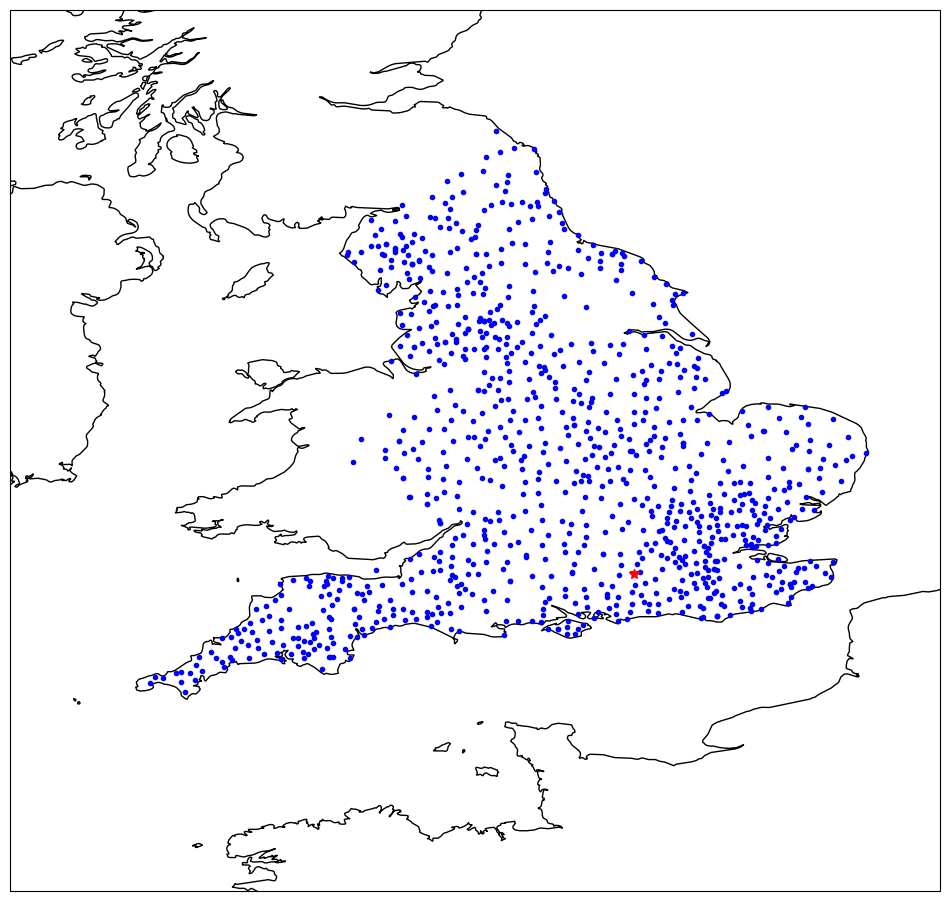

In [20]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

img_extent = (2.5, -7, 48 , 57)

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(),  extent=img_extent)
ax.coastlines(resolution = "10m")

for key in locations.keys():
    loc_dat = locations[key]
    print(loc_dat)
    ax.plot(loc_dat[0], loc_dat[1], 'bo', markersize=3, transform=ccrs.Geodetic())

guildford = [-0.63, 51.2362]
ax.plot(guildford[0], guildford[1], "r*", markersize=7, transform=ccrs.Geodetic())
plt.show()

You can see just how many rainfall stations there are. This will give a nice accurate indication of average rainfall across the Guildford area (my allotment location). 

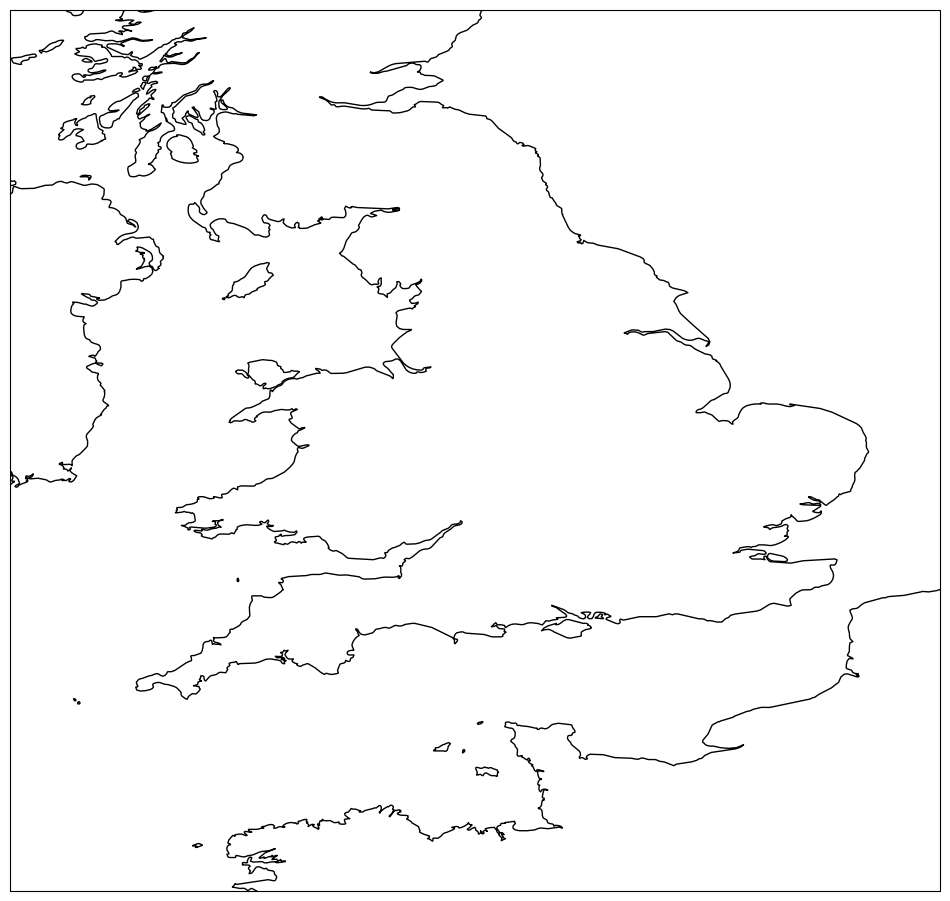

In [56]:

measures = requests.get("https://environment.data.gov.uk/flood-monitoring/id/measures?parameter=rainfall")
root_measures = measures.json()

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree(),  extent=img_extent)
ax.coastlines(resolution = "10m")

lons = []
lats = []
measures = []
for item in root_measures["items"]:
    
    try:
        measures.append(item["latestReading"]["value"])
        lats.append(item["lat"])
        lons.append(item["long"])
        print(item["latestReading"]["value"])
    except:
        pass

for lat, lon, mes in zip(lats, lons, measures):
    print(lat, lon, mes)
    ax.plot(lon, lat,"ro" , markersize=5, transform=ccrs.PlateCarree())
    
plt.show()